<a href="https://colab.research.google.com/github/sks95/Machine-Learning-Complete/blob/main/PolynomialRegression/Polynomial%26Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
# create raw dataset
x = np.linspace(-3, 3, 100).reshape(100, 1)
y = 0.5*x**2 + x + 2 + np.random.randn(100, 1)

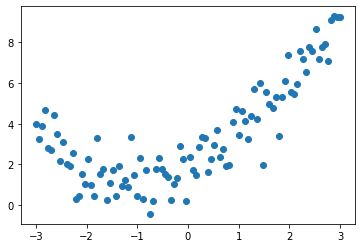

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

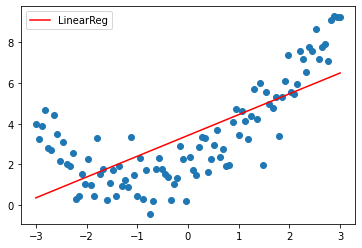

In [6]:
# plot linear regression line 
plt.scatter(x, y)
plt.plot(x, y_pred, 'r-', label='LinearReg')
plt.legend()
plt.show()

In [8]:
print('intercept: {}, coefficient: {}'.format(lr.intercept_, lr.coef_))

intercept: [3.42645651], coefficient: [[1.02298878]]


In [9]:
# import polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)

print('Old data shape: {}, New data shape: {}'.format(x.shape, x_poly.shape))

Old data shape: (100, 1), New data shape: (100, 2)


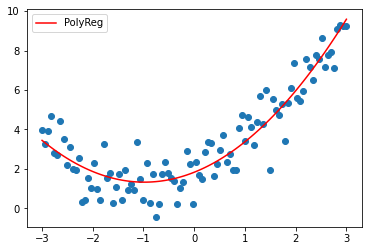

In [10]:
lr.fit(x_poly, y)
y_poly_pred = lr.predict(x_poly)

plt.scatter(x, y)
plt.plot(x, y_poly_pred, 'r-', label='PolyReg')
plt.legend()
plt.show()

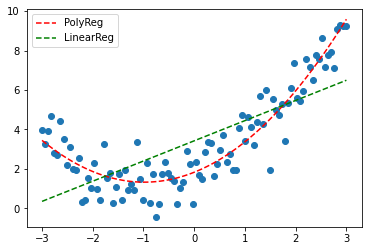

In [11]:
lr.fit(x_poly, y)
y_poly_pred = lr.predict(x_poly)

plt.scatter(x, y)
plt.plot(x, y_poly_pred, "r--", label="PolyReg")
plt.plot(x, y_pred, "g--", label="LinearReg")
plt.legend()
plt.show()

# Pipelines



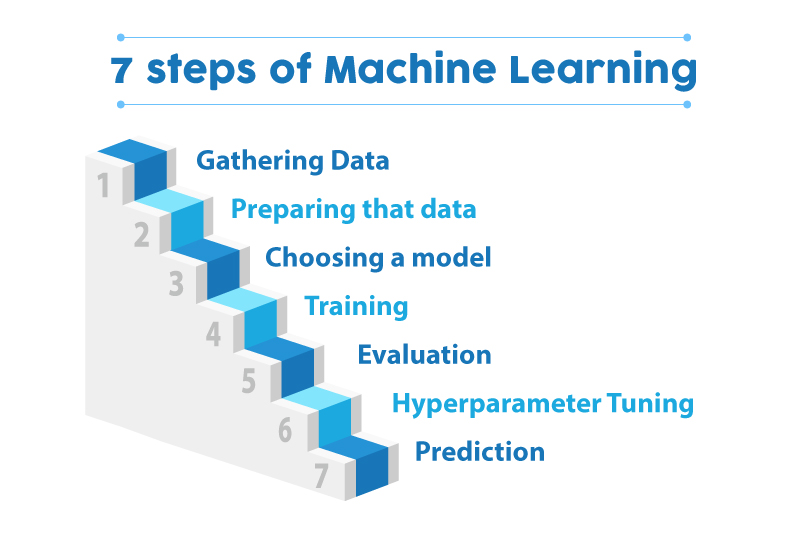

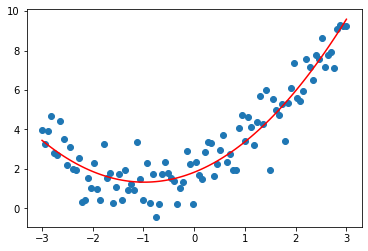

In [12]:
# feature x, label y
# 1. polynomial Feature Engineering 
# 2. Standard scale 
# 3. linear Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
poly = PolynomialFeatures(degree=2, include_bias=False)
lr = LinearRegression()
std_scaler = StandardScaler()

x_poly = poly.fit_transform(x)

x_scale = std_scaler.fit_transform(x_poly)

lr.fit(x_scale,y)

y_pred2 = lr.predict(x_scale)

plt.scatter(x, y)
plt.plot(x, y_pred2, 'r-', label="PolyReg")
plt.show()

## Using same above steps with a pipeline 

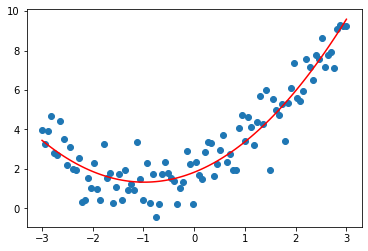

In [15]:
# feature x, label y
# 1. polynomial Feature Engineering 
# 2. Standard scale 
# 3. linear Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
lr = LinearRegression()
std_scale = StandardScaler()

model = Pipeline([
                  ('FeatureEngineering', poly),
                  ('StandardScaler', std_scale),
                  ('LinearRegression', lr)
])

model.fit(x, y)

y_poly_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_poly_pred, "r-", label='PolyReg')
plt.show()

#**UnderFitting**

**Low Variance High Bias**

**Problems** : 

1. High Bias 
2. Very Simple Modle 


**Solution** : 
1. increase model complexity(such as degree)
2. Increase number of Iteration(epochs)
3. Data Suffiling after every epochs

